In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import Imputer, LabelEncoder, StandardScaler
from sklearn import metrics

from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [2]:
def dbscan_metric(data, true_labels, dbscan_labels):
    print()
    print("DBSCAN Metric:")
    print("Homogeneity: ", metrics.homogeneity_score(true_labels, dbscan_labels))
    print("Completeness: ", metrics.completeness_score(true_labels, dbscan_labels))
    print("V-Measure: ", metrics.v_measure_score(true_labels, dbscan_labels))
    print("Silhouette Score: ", metrics.silhouette_score(data, dbscan_labels, metric='euclidean'))
    print()

In [3]:
def visualize_dbscan_clusters(data, dbscan):
    scaler = StandardScaler()
    xy = scaler.fit_transform(data)
    num_noisy_points = num_noisy_points = np.count_nonzero(dbscan.labels_ == -1)
    
    plt.figure(figsize=(8,6), dpi=120)
    for i in range(0, len(xy)):
        if dbscan.labels_[i] == 0:
            c1 = plt.scatter(xy[i, 0], xy[i, 1], c='r', marker='+')
        elif dbscan.labels_[i] == 1:
            c2 = plt.scatter(xy[i, 0], xy[i, 1], c='g', marker='o')
        elif dbscan.labels_[i] == -1:
            c3 = plt.scatter(xy[i, 0], xy[i, 1] ,c='b', marker='*')
        
    plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
    plt.title('Clustering with k={} clusters and {} noisy points (*)'.format(3, num_noisy_points))
    plt.show()

In [4]:
# Laden der Daten
csv = pd.read_csv("../Data/Biral_Products_csv.csv", delimiter=",", header=0)
csv.drop(columns=["Bezeichnung", "Beschreibung", "Anwendungsgebiet"], inplace=True)
data = np.array(csv)

# Gruppenbezeichnung one-hot eoncoden
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data[:,0])
print(integer_encoded.shape)

csv = csv.assign(category_one_hot = integer_encoded)
labels = csv.category_one_hot

# Gruppenbezeichnung nach dem one-hot encoding entfernen.
csv.drop(columns="Gruppenbezeichnung", inplace=True)
data = np.array(csv)

print(data.shape)

(222,)
(222, 16)


In [5]:
# Missing Values mit dem Most Frequent Value ersetzen.
imputer_scaler = Imputer(missing_values="NaN", strategy="most_frequent", verbose=1)
data = imputer_scaler.fit_transform(data)
print(data.shape)

(222, 16)


#### Erster Versuch mit DBSCAN

In [21]:
db_scan = DBSCAN(eps=1.2, min_samples=2, metric='euclidean').fit(data)
dbscan_metric(data, labels, db_scan.labels_)


DBSCAN Metric:
Homogeneity:  0.2537302950765808
Completeness:  0.18746604569951006
V-Measure:  0.21562198366607185
Silhouette Score:  -0.2939989012530716



#### Zweiter Versuch mit PCA mit 2 Components

Original Shape: (222, 16)
Reduced Shape: (222, 2)

DBSCAN Metric:
Homogeneity:  0.31328912982098134
Completeness:  0.0898257742916558
V-Measure:  0.13961993653038204
Silhouette Score:  0.4085494159394022



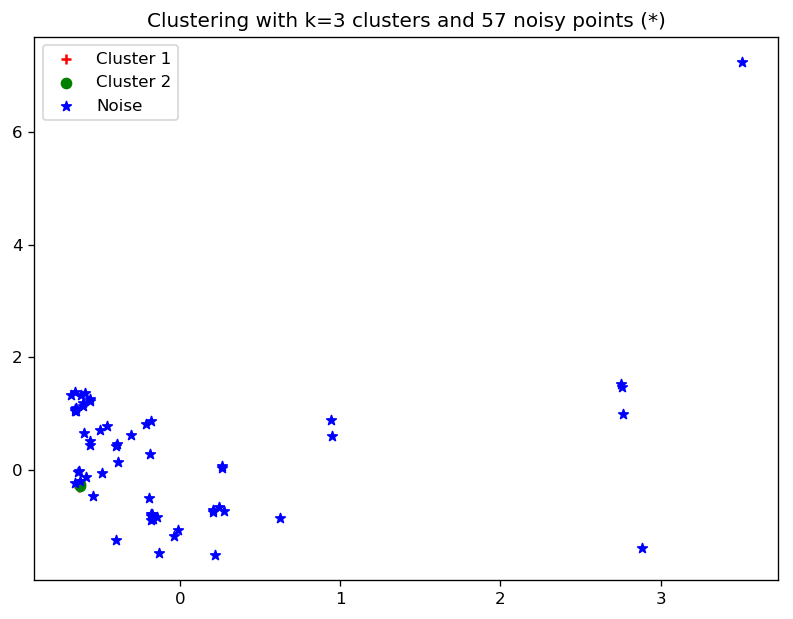

In [39]:
pca = PCA(n_components=2)
pca.fit(data)
data_pca = pca.transform(data)
print("Original Shape: {}".format(str(data.shape)))
print("Reduced Shape: {}".format(str(data_pca.shape)))

db_scan = DBSCAN(eps=1.2, min_samples=2, metric='euclidean').fit(data_pca)
dbscan_metric(data_pca, labels, db_scan.labels_)
visualize_dbscan_clusters(data_pca, db_scan)